<font color='DarkTurquoise'>

# Analysis of The Week News

</font>

### The Week News – The British publication  founded in 1995

<font color='DarkTurquoise'>
Aim: 
</font>
find out if the foreign media still remembers the events in Ukraine

In [111]:
import pandas as pd

#### Creating dataframe

In [112]:
df = pd.read_json("theweek.json")
df

,header,date
0,"Crypto risk, stealth wealth and the end of Vice",2023-05-19
1,The rehabilitation of Syria’s Bashar al-Assad,2023-05-19
2,AI job fears: how can we regulate the ‘rise of...,2023-05-19
3,Pakistan enters ‘uncharted territory’,2023-05-19
4,‘The great AI jobs bloodbath’,2023-05-19
...,...,...
1469,The psychological war between Russia and Ukraine,2022-03-04
1470,How reliant is Britain on Russian gas?,2022-03-04
1471,France’s withdrawal from Mali: a victory for t...,2022-03-04
1472,Londongrad: what is the cost of Russian-linked...,2022-03-04


Keywords for scraping news

In [113]:
anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky"
]

#### Creating dataframe with news about Ukraine

In [114]:
def check(string: str):
    for word in anchors:
        if word in string.lower():
            return True
    return False

war_df = df[df['header'].apply(lambda x: check(x))]
war_df.head()

,header,date
6,Nato vs. Russia: who would win?,2023-05-18
8,Russia’s allies: who is supporting Putin?,2023-05-18
10,How fruitful was Zelenskyy’s European tour?,2023-05-18
28,Russia’s scaled-back Victory Day parade,2023-05-12
48,Evan Gershkovich: what does Russia want from j...,2023-04-03


<font color='DarkTurquoise'>

## February 2022 - December 2022
</font>

In [115]:
from datetime import datetime
import matplotlib.pyplot as plt

Creating dataframe for period (February 2022 - December 2022)

In [116]:
def get_month(date: datetime):
    return date.month

df_2022 = df.loc[df['date'] < datetime(2023, 1, 1)].copy()
df_2022.loc[:, 'month'] = df_2022['date'].apply(lambda x: get_month(x))

df_2022.head()



,header,date,month
447,What will happen in 2023?,2022-12-30,12
456,Sport’s big winners of 2022,2022-12-29,12
457,Celebrities and global icons who died in 2022,2022-12-29,12
458,The best tabloid stories of 2022,2022-12-27,12
459,People of 2022: from Meghan Markle to Matt Han...,2022-12-27,12


Creating dataframe with news about Ukraine for period (February 2022 - December 2022)

In [117]:
war_df_2022 = war_df.loc[war_df['date'] < datetime(2023, 1, 1)].copy()
war_df_2022.loc[:, 'month'] = war_df_2022['date'].apply(lambda x: get_month(x))

war_df_2022.head()

,header,date,month
462,Putin believes in Santa ‘like all decent peopl...,2022-12-23,12
475,Can landmark Zelenskyy visit to Washington cha...,2022-12-21,12
495,What next for the world if Russia loses in Ukr...,2022-12-16,12
503,VDV: who are Russia’s elite airborne force?,2022-11-28,11
514,"Trump’s trial, Ukraine’s art and extra extra time",2022-11-25,11


Calculation of percentages of Ukrainian news

In [118]:
war_perc_2022 = []
months = list(range(2, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

war_perc_2022

[38.46, 51.39, 26.09, 23.08, 25.32, 7.58, 15.0, 15.79, 6.52, 9.01, 8.86]

### Visualisation of 2022

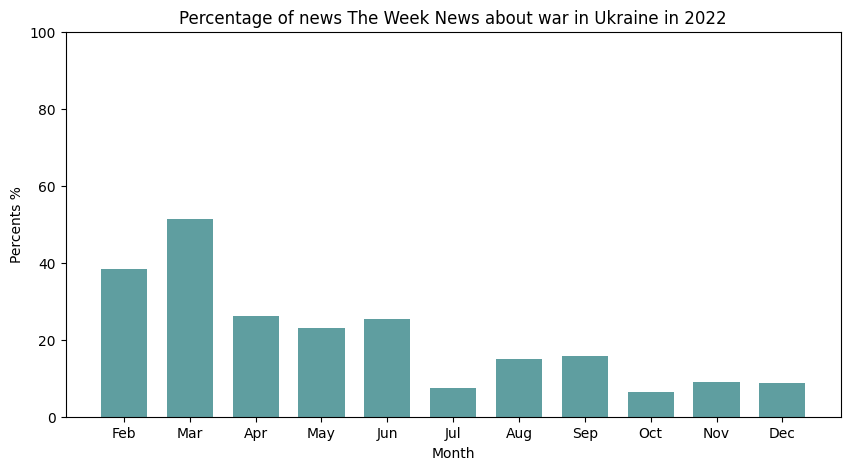

In [119]:
months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))

plt.bar(months, war_perc_2022, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news The Week News about war in Ukraine in 2022")
plt.show()

<font color='DarkTurquoise'>

## January 2023 - May 2023
</font>

Creating dataframe for period (January 2023 - May 2023)

In [120]:
df_2023 = df.loc[df['date'] >= datetime(2023, 1, 1)].copy()
df_2023.loc[:, 'month'] = df_2023['date'].apply(lambda x: get_month(x))

df_2023.head()

,header,date,month
0,"Crypto risk, stealth wealth and the end of Vice",2023-05-19,5
1,The rehabilitation of Syria’s Bashar al-Assad,2023-05-19,5
2,AI job fears: how can we regulate the ‘rise of...,2023-05-19,5
3,Pakistan enters ‘uncharted territory’,2023-05-19,5
4,‘The great AI jobs bloodbath’,2023-05-19,5


Creating dataframe with news about Ukraine for period (January 2023 - May 2023)

In [121]:
war_df_2023 = war_df.loc[war_df['date'] >= datetime(2023, 1, 1)].copy()
war_df_2023.loc[:, 'month'] = war_df_2023['date'].apply(lambda x: get_month(x))

war_df_2023.head()

,header,date,month
6,Nato vs. Russia: who would win?,2023-05-18,5
8,Russia’s allies: who is supporting Putin?,2023-05-18,5
10,How fruitful was Zelenskyy’s European tour?,2023-05-18,5
28,Russia’s scaled-back Victory Day parade,2023-05-12,5
48,Evan Gershkovich: what does Russia want from j...,2023-04-03,4


Calculation of percentages of Ukrainian news

In [122]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

war_perc_2023

[8.91, 14.43, 8.65, 5.43, 10.48]

### Visualisation of 2023

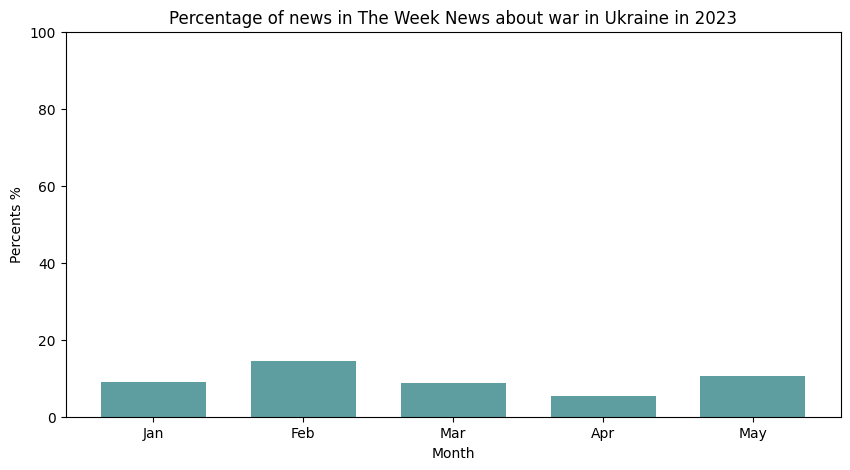

In [123]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))

plt.bar(months, war_perc_2023, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in The Week News about war in Ukraine in 2023")
plt.show()